# 6주차 과제

Made by 35기 코딩부장 류제현

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 시계열데이터(주가) 분석

    1-1) 우선 삼성전자주가, 카카오주가 csv파일을 불러옵시다 

            Date를 인덱스로 설정하고, datetime으로 변환해줍니다

    1-2) 종가(Close)를 사용하여, 종가와 함께 **삼성전자**의 120일 이동평균선과 20일 이동평균선을 그려봅시다

    1-3) 카카오 주가(종가)그래프에, 볼린저 밴드를 추가해봅시다 볼린저 밴드의 공식은 아래와 같습니다 (n=20, m=2를 사용합니다)

* 볼린저 밴드는 Matplotlib의 fill_between 함수를 사용해 그릴 수 있습니다 (그림의 투명도는 alpha 매개변수로 조절합니다)

---
    볼린저 밴드 공식

$BOLU = MA(TP, n) + m * \sigma[TP, n] $

$BOLD = MA(TP, n) - m * \sigma[TP, n] $


$Where: $

$BOLU = $ Upper Bollinger Band

$BOLD = $ Lower Bollinger Band

$MA = $ Moving Average

$TP = $ (High $+$ Low $+$ Close) $ \div 3 $ 

$n = $ Number of days in smoothing period (typically 20)

$m = $ Number of standard deviations (typically 2)

$\sigma[TP, n] = $ Standard Deviation over last $n$ periods of $TP$

    1-4) 카카오와 삼성전자의 CAGR을 구해봅시다(종가(Close) 기준). 단, 연도별로 계산합니다 (Ex. 2020년:10%, 2021년:12% ...)

결과는 데이터프레임으로 출력해주세요 / 마지막 열은 5년간 CAGR을 기록해주세요

---

$CAGR(t_0, t_n) = ({V(t_n) \over V(t_0)})^{1 \over {t_n - t_0}} - 1$

$Where \ V(t_0)$는 시작값, $V(t_n)$는 끝값, $t_n - t_0$는 년수이다.

    1-5) Optional !! : 삼성전자 주가(종가) 그래프를 거래량과 함께 그려보세요!

* Matplotlib을 사용해 여러 방식으로 그릴 수도 있지만, plotly라는 시각화 라이브러리를 사용하면 더 쉽게 그릴 수 있습니다

## 2. 주성분 분석(PCA)과 머신러닝

    음원 스트리밍 기업 Spotify에서 받아온 실제 데이터셋을 사용해 봅시다

In [3]:
spotify = pd.read_csv("spotify.csv")
print(spotify.shape) #32833개의 Data

# 컬럼의 일부만 사용하겠습니다
spotify = spotify.loc[:,['playlist_genre', 'danceability',
                         'energy','loudness','speechiness', 'acousticness', 
                         'instrumentalness','liveness', 'valence', 'tempo']]
spotify.head()

(32833, 23)


,playlist_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976


    2-1) playlist_genre를 기준으로 데이터셋을 합친 후, 각각 특성의 평균을 구해 봅시다. (pandas의 groupby를 사용합니다)

        * 가장 energy의 평균이 높은 음악 장르는 무엇이고 그럴듯한가요?
        * 가장 acousticness가 높은 장르는 무엇이고 그럴듯한가요? 

    2-2)  주성분 분석으로 데이터셋을 3차원으로 줄여봅시다

    * 3개의 주성분은 데이터셋의 분산을 몇 퍼센트 설명하나요? 

* 주의: 장르는 pca 모형에 넣으면 안됩니다**

In [ ]:
from sklearn.decomposition import PCA



    2-3) 3개의 차원으로 줄인 데이터셋을 3차원으로 시각화해봅시다

    * scatter plot으로 그리는데, 각 point의 색상이 genre가 되도록 그리겠습니다. 아래 예시 코드가 이어집니다

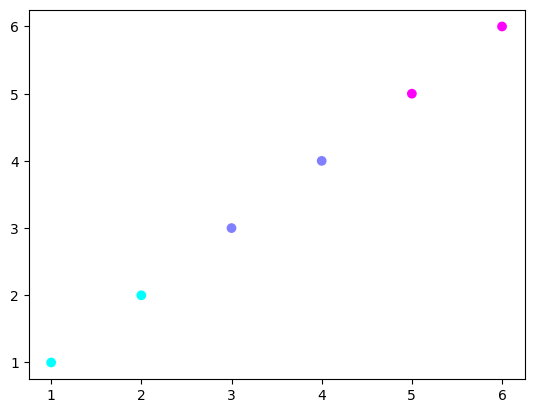

In [4]:
# 예시코드

# 데이터 생성
x = [1,2,3,4,5,6]
y = [1,2,3,4,5,6]
c = [0,0,1,1,2,2]

# 색상(c)을 하나의 색이 아닌, array로 주고, colormap을 의미하는 cmap을 지정해주변 됩니다
# 컬러맵은 다양한 것이 있는데, 여기서 확인할 수 있습니다 -> https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py 
plt.scatter(x,y,c=c, cmap="cool"); # binary, cool, hot 등..

In [ ]:
# PCA로 차원을 3개로 줄인 spotify 데이터셋을 시각화해봅시다

# 이 코드는 문자열로 된 장르를 숫자로 변환해줍니다(c=genre 를 해주면 되겠죠?)
genre = spotify.playlist_genre.astype('category').cat.codes

# 3d plot을 그려줍니다
from mpl_toolkits.mplot3d import Axes3D


    2-4) 기존 데이터셋으로, 음악 장르를 분류하는 머신러닝 모델을 만들어 봅시다 (PCA를 사용하지 않은 데이터셋으로)

**아무 알고리즘이나 사용하셔도 좋습니다!**
    
    * Train-set과 Test-set으로 데이터셋을 분리해주세요 (sklearn의 train_test_split(X_data, y_data, stratify=y_data) 꼴로 분리해주세요)
    * 1. 학습시간이 얼마나 걸렸나요?
    * 2. Test-set에 대한 정확도는 얼마인가요?

In [ ]:
from sklearn.model_selection import train_test_split


    2-4) PCA로 차원을 3개로 줄인 데이터셋을 사용하여, 음악 장르를 분류하는 머신러닝 모델을 만들어 봅시다

**앞에서 사용한 알고리즘과 동일한 알고리즘을 사용해주세요!**
    
    # PCA를 사용해, 앞에서 train-test-split으로 분리한 데이터를 3개의 차원으로 축소해주세요
    * 1. 학습시간이 얼마나 걸렸나요?
    * 2. Test-set에 대한 정확도는 얼마인가요?